In [1]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12, 10]

## A Cautionary Tale

Let's start with a cautionary tale about mapping out a region of sky.  Let's say we wish to map the Galactic pole ($b=+90^\circ$) with a telescope that has an angular radius of $3^\circ$ (i.e. a FWHM of $6^\circ$). So we make an array of pointings spaced every $3^\circ$ in longitude and latitude covering those regions:

In [33]:
glats = range(84, 91, 3)
glons = range(-180, 180, 3)
pointings = np.array([(L,b) for L in glons for b in glats])
print('Number of pointings:', pointings.shape[0])

Number of pointings: 360


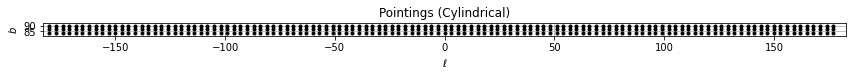

In [34]:
plt.figure(figsize=(2*7.2, 2*0.12))
plt.plot(pointings[:,0], pointings[:,1], 'k.')
plt.grid()
plt.xlabel('$\ell$')
plt.xlim(-183,183)
plt.ylim(81,93)
plt.ylabel('$b$')
_ = plt.title('Pointings (Cylindrical)')

This looks like a nice, regularly-spaced grid of pointings. But it isn't.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.


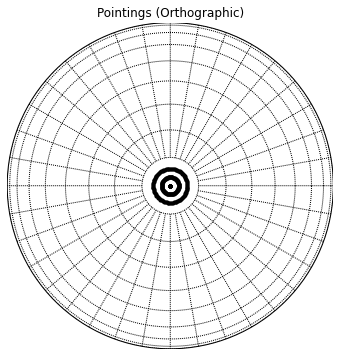

In [32]:
plt.figure(figsize=(6,6))
m = Basemap(projection='ortho', # Stereographic projection
            lon_0 = 0,       # Rightmost extent
            lat_0 = 90)        # Center latitude

m.drawparallels(np.arange(0,90,10))
m.drawmeridians(np.arange(0,360,10))
m.plot(pointings[:,0],pointings[:,1], 'k.', latlon=True)
_ = plt.title('Pointings (Orthographic)')

In the worst case, the entire top row of pointings mapped to one single point at the pole. The other rows are only marignally better: the longitudes may be spaced every $3^\circ$, but the actual separation between pointings on
the sky is much less than that.

We've spent 360 pointings covering about $\pi (6^\circ)^2\approx110$ square degrees on the sky (roughly 3 pointings per square degree), but our beam had an angular area of about 28 square degrees. We could have Nyquist sampled this region with about $110 / (28 / 4)\approx16$ pointings (the factor of 4 accounts for Nyquist sampling along two axes).

In [2]:
# The Galactic Plane

lmin = -10; lmax = 250
bmin = -2; bmax = 2

coordinates = []
b = np.arange(-10,10,step=2)
for bi in b:
    l = lmin
    while l<lmax:
        coordinates.append((l,bi))
        l += 2/np.cos(np.radians(bi))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


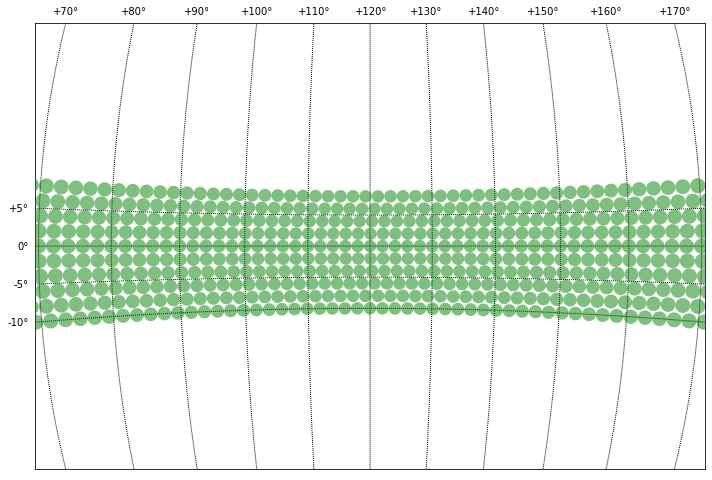

In [3]:
m = Basemap(projection='stere',  # Stereographic projection
            width = 12000000,
            height = 8000000,
            lon_0 = 120,        # Rightmost extent
            lat_0 = 0)         # Center latitude
m.drawparallels(np.arange(-10,10,5), labels=[1,0,0,0], labelstyle='+/-')
m.drawmeridians(np.arange(-10,250,10), labels=[0,0,1,0], labelstyle='+/-')
for x,y in coordinates:
    poly = m.tissot(x,y,1,100,facecolor='green',zorder=10,alpha=0.5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until


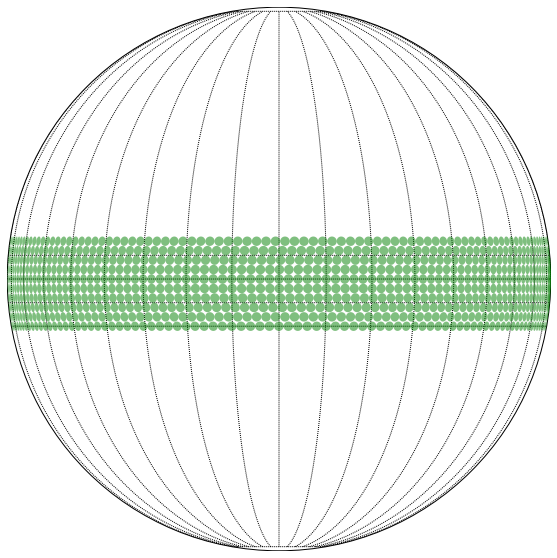

In [4]:
m = Basemap(projection='ortho', # Stereographic projection
            lon_0 = 120,       # Rightmost extent
            lat_0 = 0)        # Center latitude

m.drawparallels(np.arange(-10,10,5))
m.drawmeridians(np.arange(-10,250,10))
for x,y in coordinates:
    poly = m.tissot(x,y,1,100,facecolor='green',zorder=10,alpha=0.5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


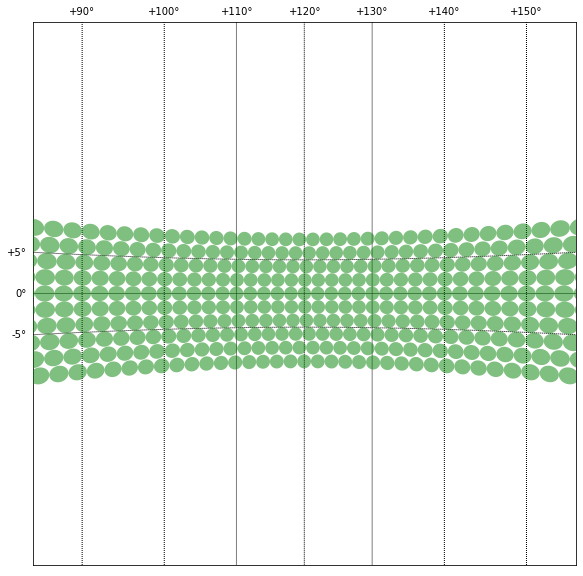

In [5]:
# Gnomonic projection
m = Basemap(height=9e6, width=9e6, projection='gnom',lat_0=0, lon_0=120)
m.drawparallels(np.arange(-5,6,5), labels=[1,0,0,0], labelstyle='+/-')
m.drawmeridians(np.arange(-10,250,10), labels=[0,0,1,0], labelstyle='+/-')
for x,y in coordinates:
    poly = m.tissot(x,y,1,100,facecolor='green',zorder=10,alpha=0.5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


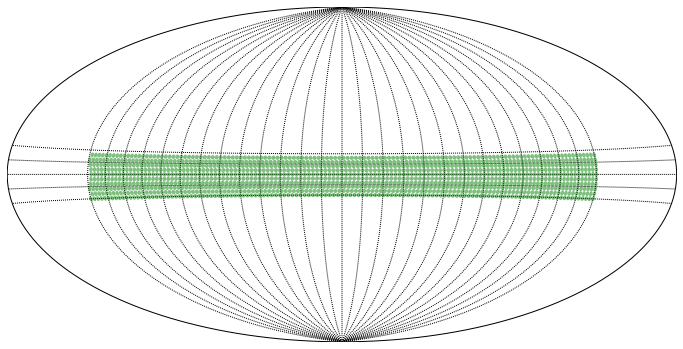

In [6]:
# Hammer- Aitoff projection
m = Basemap(projection='hammer',lon_0 = 120,llcrnrlat=-10,urcrnrlat=10)
m.drawparallels(np.arange(-10,15,5))
m.drawmeridians(np.arange(-10,260,10))
for x,y in coordinates:
    poly = m.tissot(x,y,1,100,facecolor='green',zorder=10,alpha=0.5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


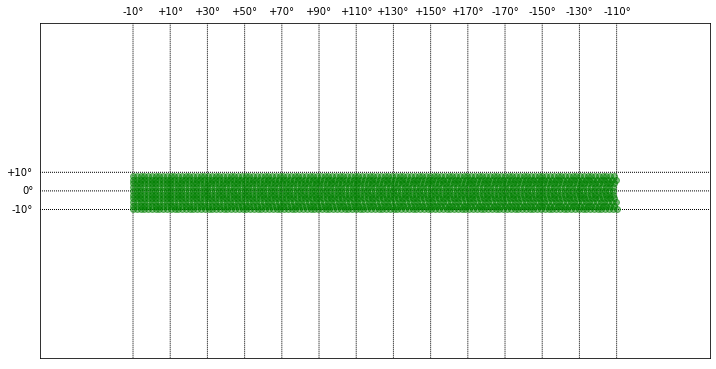

In [7]:
# Equidistant Cylindrical Projection
m = Basemap(projection='cyl',lat_0 = 0, lon_0 = 120,llcrnrlat=-10,urcrnrlat=10)
m.drawparallels(np.arange(-10,11,10), labels=[1,0,0,0], labelstyle='+/-')
m.drawmeridians(np.arange(-10,251,20), labels=[0,0,1,0], labelstyle='+/-')
for x,y in coordinates:
    m.plot(x,y,'og',alpha=0.5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """Entry point for launching an IPython kernel.


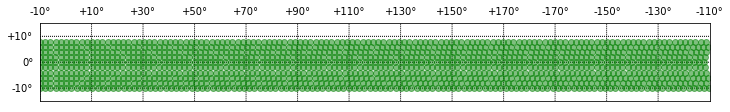

In [8]:
m = Basemap(projection='merc',llcrnrlat=-15,urcrnrlat=15,llcrnrlon=-10,urcrnrlon=250,lat_ts=0,resolution='c')
m.drawparallels(np.arange(-10,11,10), labels=[1,0,0,0], labelstyle='+/-')
m.drawmeridians(np.arange(-10,251,20), labels=[0,0,1,0], labelstyle='+/-')
for l,b in coordinates:
    x,y = m(l,b)
    m.plot(x,y,'og',alpha=0.5)